## Melbourne Housing Analysis

### 1. About Data
This is a snapshot of Melbourne's real estate dataset created by Tony Pino.

This data was scraped from publicly available results posted every week from Domain.com.au. The data is believed to be cleaned by the author. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### 2. Attibutes
* Rooms: Number of rooms

* Price: Price in dollars

* Method: 
    * S - property sold; 
    * SP - property sold prior; 
    * PI - property passed in; 
    * PN - sold prior not disclosed; 
    * SN - sold not disclosed; 
    * NB - no bid; 
    * VB - vendor bid; 
    * W - withdrawn prior to auction; 
    * SA - sold after auction; 
    * SS - sold after auction price not disclosed. 
    * N/A - price or highest bid not available.

* Type: 
    * br - bedroom(s); 
    * h - house,cottage,villa, semi,terrace; 
    * u - unit, duplex; 
    * t - townhouse; dev site - development site; 
    * o res - other residential.

* SellerG: Real Estate Agent

* Date: Date sold

* Distance: Distance from CBD

* Regionname: General Region (West, North West, North, North east …etc)

* Propertycount: Number of properties that exist in the suburb.

* Bedroom2 : Scraped # of Bedrooms (from different source)

* Bathroom: Number of Bathrooms

* Car: Number of carspots

* Landsize: Land Size

* BuildingArea: Building Size

* CouncilArea: Governing council for the area

#### Data Wrangling

In [1]:
# Importation of relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and Reading In data
melbourne_path = '../Housing Prices Project/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_path)

In [3]:
# Calling the first 5 entries of the data
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# Checking if there are null values in the dataset
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

* It seems most of the columns are quite okay and without null counts.
* However columns like `Car`, `Building Area`, `YearBuilt`, and `CouncilArea` are with null counts.

In [5]:
# Checking if there are duplicates in the dataset
print('Duplicated Values:', melbourne_data.duplicated().sum())

Duplicated Values: 0


In [6]:
#Null counts per column
melbourne_data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [64]:
# Finding the number of zeros present in the dataset
melbourne.eq(0).sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            4
Postcode            0
Bedroom2            5
Bathroom            0
Car               431
Landsize         1015
BuildingArea        1
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
# Shape of the dataset
print('Rows & Columns: {}'.format(melbourne_data.shape))

Rows & Columns: (13580, 21)


In [8]:
# Total Number of entries
print('Total Entries: {}'.format(melbourne_data.size))

Total Entries: 285180


In [9]:
# Columns that came with the dataset
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
# Cleaning the null counts from the dataset
melbourne = melbourne_data.dropna()
melbourne

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [11]:
# Verifying if the null counts are removed
melbourne.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

#### Data Exploration

In [12]:
#  Descriptive Statistics
melbourne.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Postcode,6196.0,3.101948e+03,86.421604,3000.00000,3044.000000,3081.00000,3.147000e+03,3.977000e+03
Bedroom2,6196.0,2.902034e+00,0.970055,0.00000,2.000000,3.00000,3.000000e+00,9.000000e+00
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03


* The highest price for a housing listing is roughly about 9,000,000 dollars.
* The least pricing of a house is around 880,000 dollars. However, the average pricing listed per the scraped data falls around 1,068,828 dollars with building area of about 196 square metres and land size of about 471 square metres.



In [112]:
numerical_columns = melbourne.select_dtypes(exclude = 'object')
categorical_columns = melbourne.select_dtypes(include = 'object')

print('Numerical Columns: \n {}'.format(numerical_columns.columns))
print(" ")
print('Categorical Columns: \n {}'.format(categorical_columns.columns))

Numerical Columns: 
 Index(['Rooms', 'Price', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount'],
      dtype='object')
 
Categorical Columns: 
 Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [13]:
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

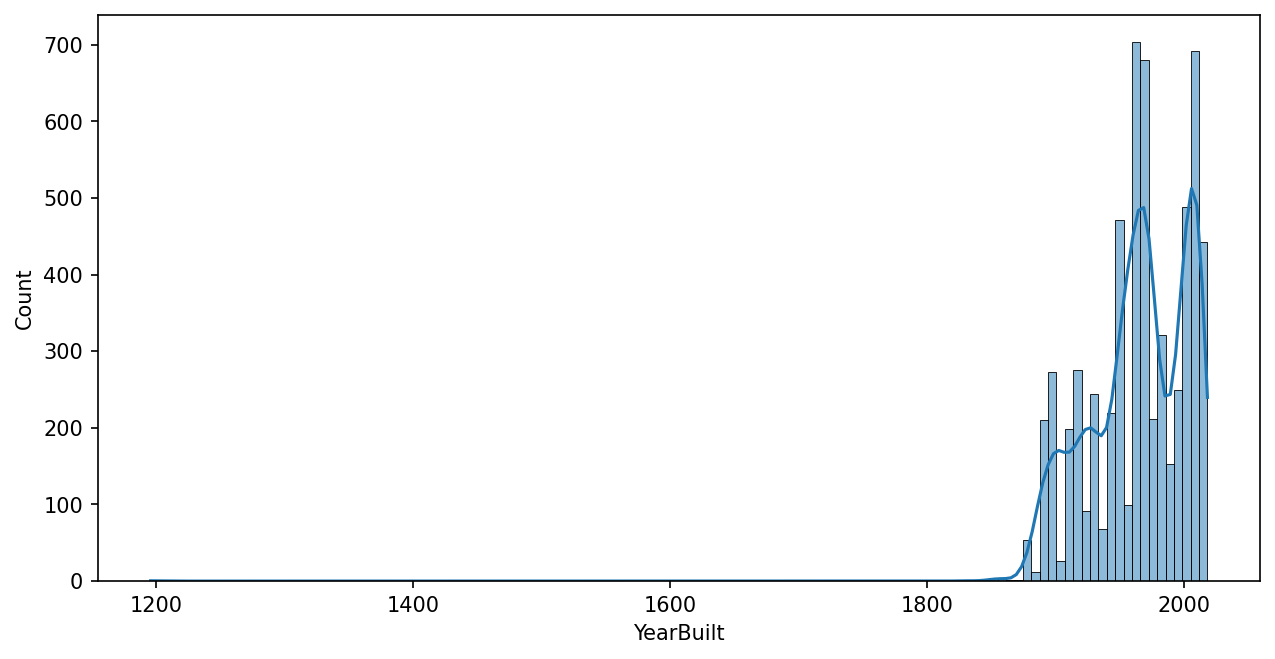

In [83]:
plt.figure(figsize=(10,5), dpi=150)
sns.histplot(x='YearBuilt', data=melbourne, kde=True)

In [15]:
melbourne.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 6196 entries, 1 to 12212
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
6196 non-null   object
dtypes: object(1)
memory usage: 96.8+ KB


In [16]:
# Converting the 'dtype' to date
melbourne.Date = pd.to_datetime(melbourne.Date)

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\p

In [17]:
melbourne.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 6196 entries, 1 to 12212
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6196 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 96.8 KB


[Text(0.5, 1.0, 'Pricing of Listing across the years')]

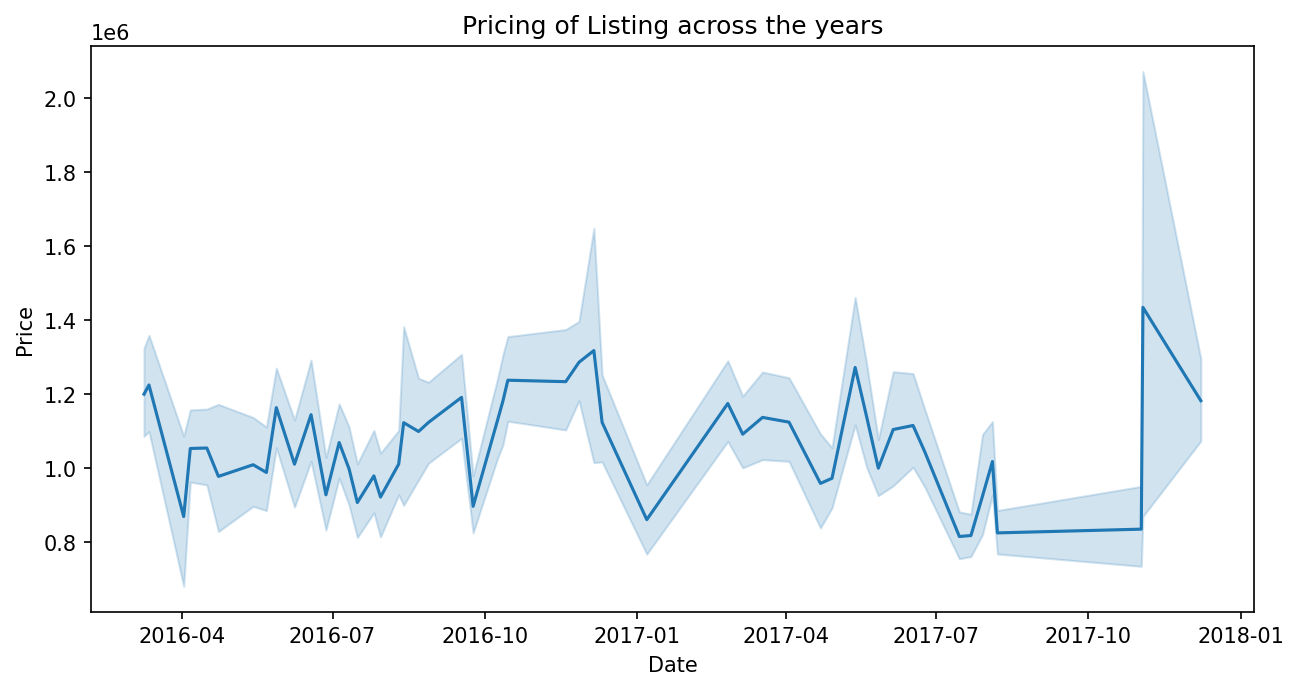

In [84]:
plt.figure(figsize=(10,5), dpi=150)
sns.lineplot(x='Date', y='Price', data=melbourne).set(title='Pricing of Listing across the years')

In [19]:
# Top 10 Suburbs with highest listings
melbourne.Suburb.value_counts().head(10)

Reservoir         154
Richmond          138
Brunswick         124
Bentleigh East    106
Coburg            102
Preston            99
Essendon           99
Hawthorn           95
Yarraville         89
Pascoe Vale        87
Name: Suburb, dtype: int64

Text(0.5, 1.0, 'Top 10 Suburbs with highest listings')

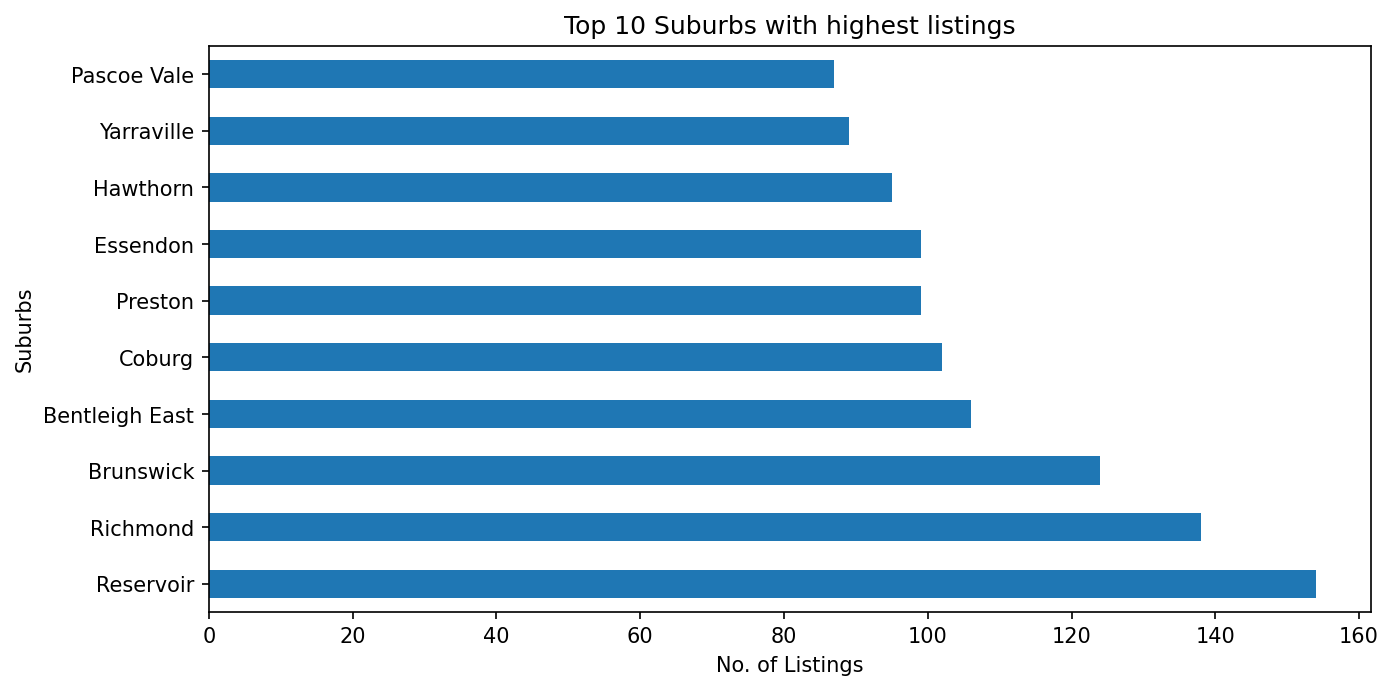

In [85]:
plt.figure(figsize=(10,5), dpi=150)
melbourne.Suburb.value_counts().head(10).plot(kind='barh')
plt.xlabel('No. of Listings')
plt.ylabel('Suburbs')
plt.title('Top 10 Suburbs with highest listings')

[Text(0.5, 1.0, 'Geographical Location of the Listings in Melbourne')]

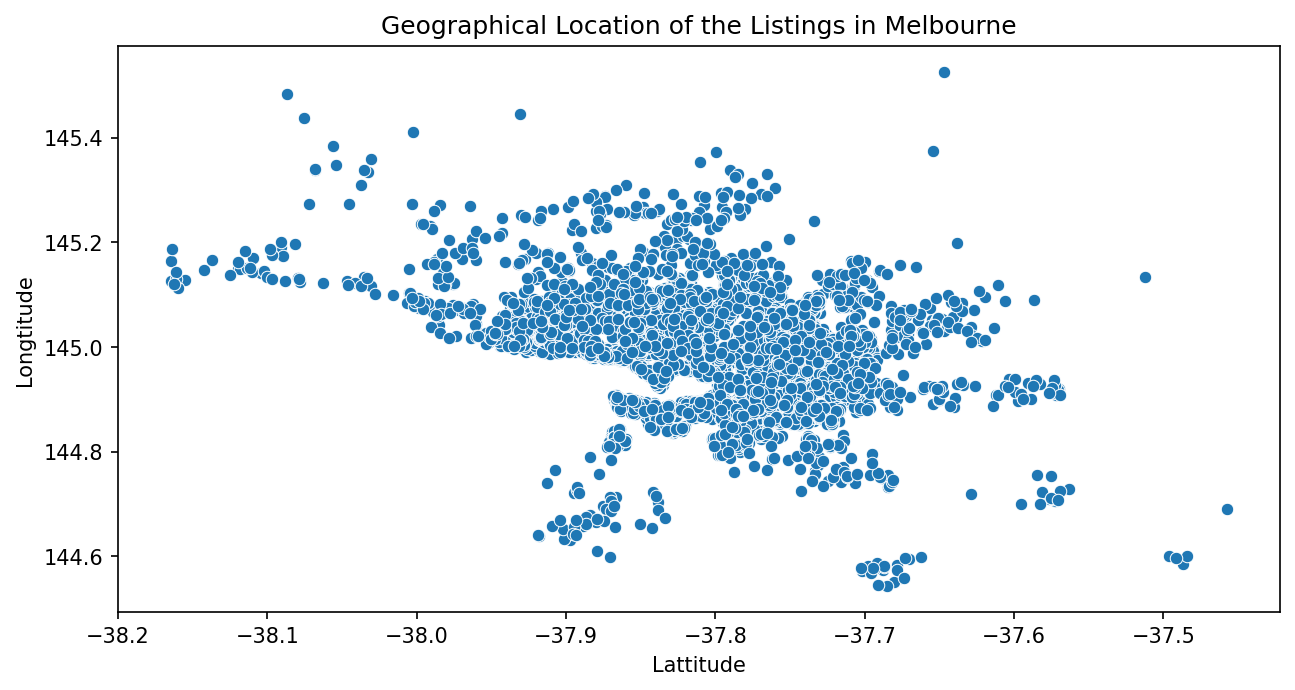

In [86]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=melbourne, x='Lattitude', y='Longtitude').set(title='Geographical Location of the Listings in Melbourne')

[Text(0.5, 1.0, 'Geographical Location of the Listings in Melbourne')]

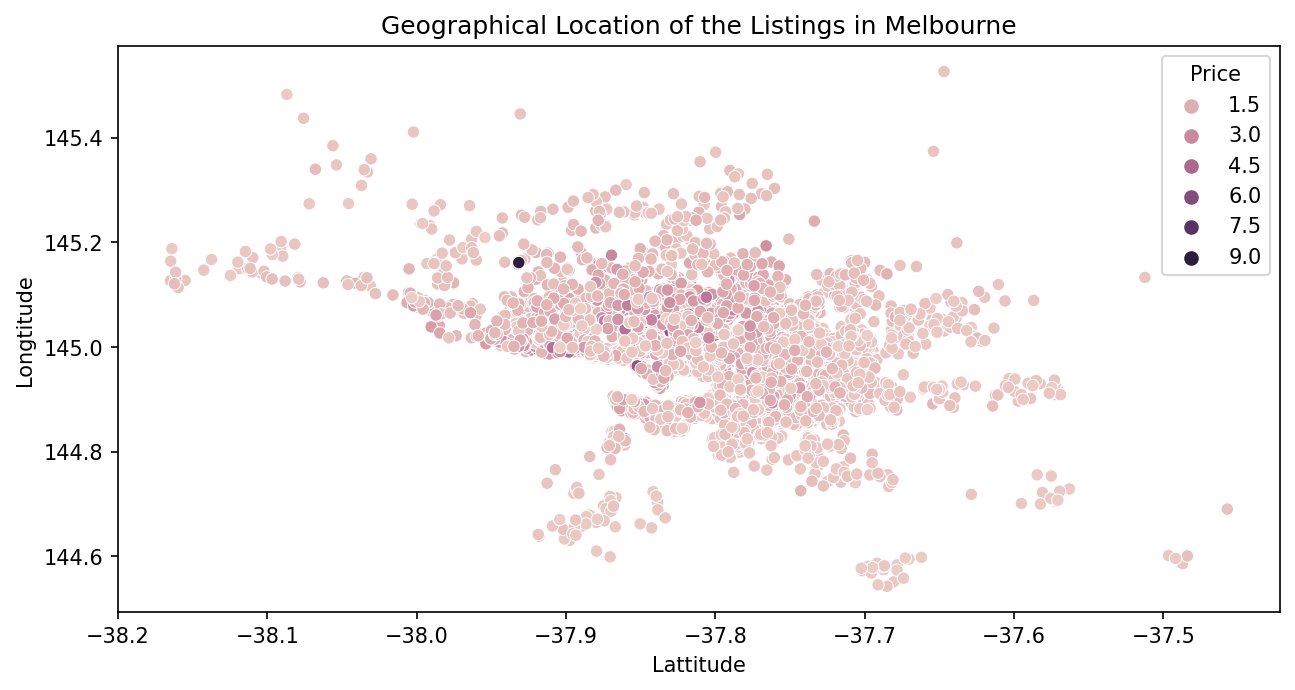

In [87]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=melbourne, x='Lattitude', y='Longtitude', hue='Price').set(title='Geographical Location of the Listings in Melbourne')

[Text(0.5, 1.0, 'Geographical Location of the Listings in Melbourne')]

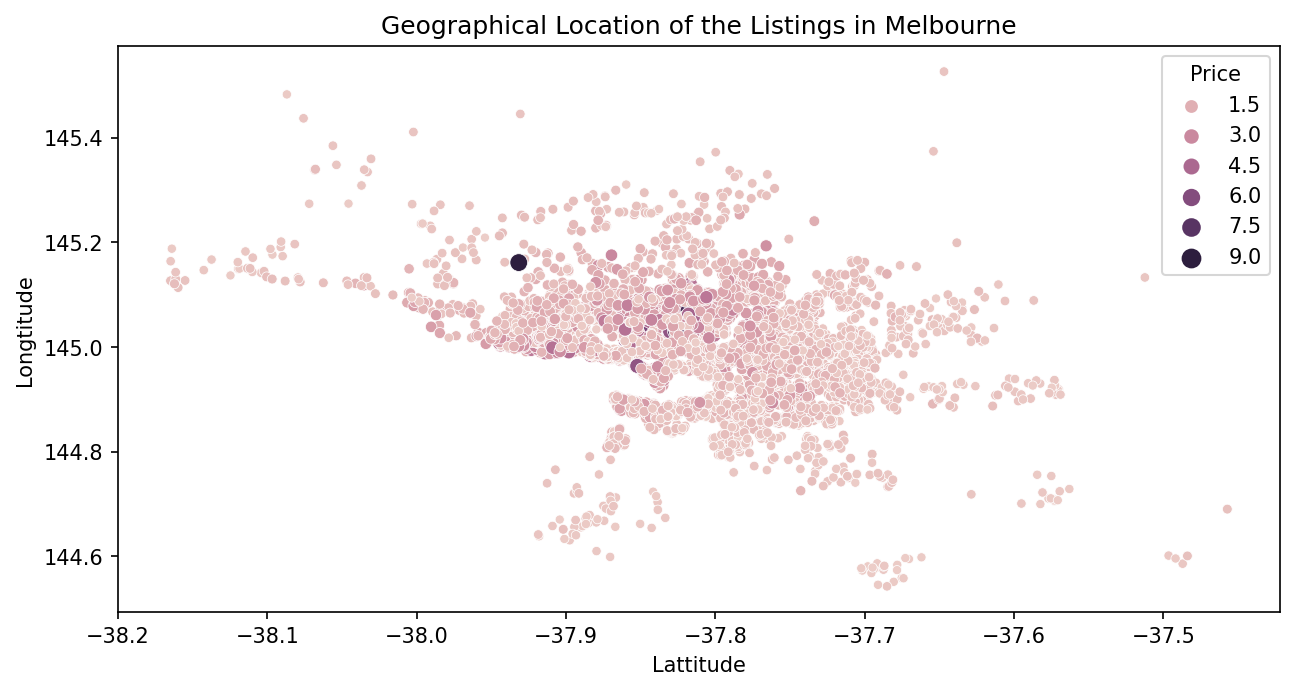

In [88]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=melbourne, x='Lattitude', y='Longtitude', hue='Price', size='Price').set(title='Geographical Location of the Listings in Melbourne')

In [24]:
# Rooms availabile for listing
melbourne.Rooms.value_counts()

3    2541
2    1730
4    1278
1     329
5     281
6      28
7       6
8       3
Name: Rooms, dtype: int64

<Figure size 1500x750 with 0 Axes>

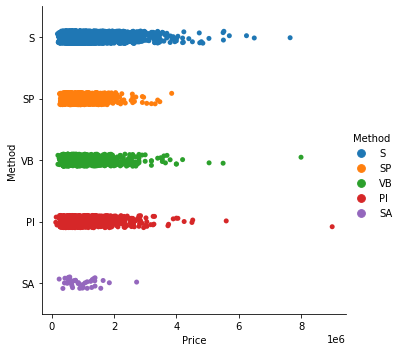

In [89]:
plt.figure(figsize=(10,5), dpi=150)
sns.catplot(x='Price',data=melbourne, y='Method', hue='Method')

<AxesSubplot:xlabel='Method', ylabel='Price'>

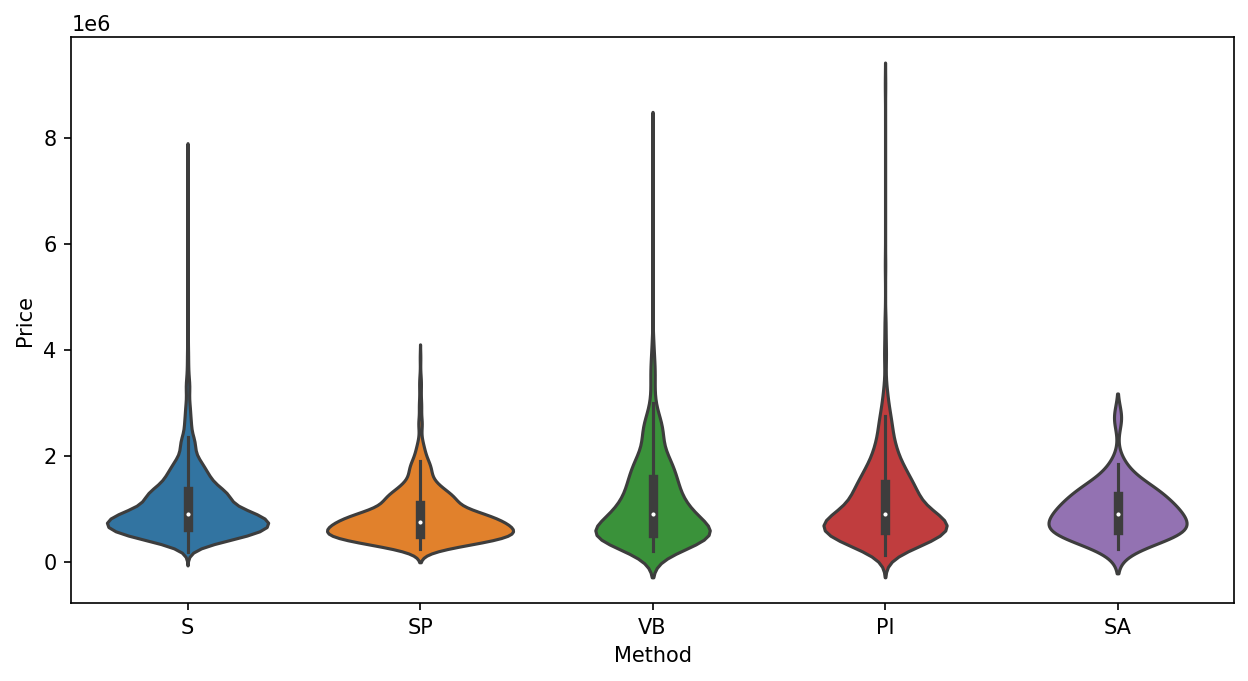

In [90]:
plt.figure(figsize=(10,5), dpi=150)
sns.violinplot(y='Price', x='Method', data=melbourne)

<AxesSubplot:xlabel='Price', ylabel='Method'>

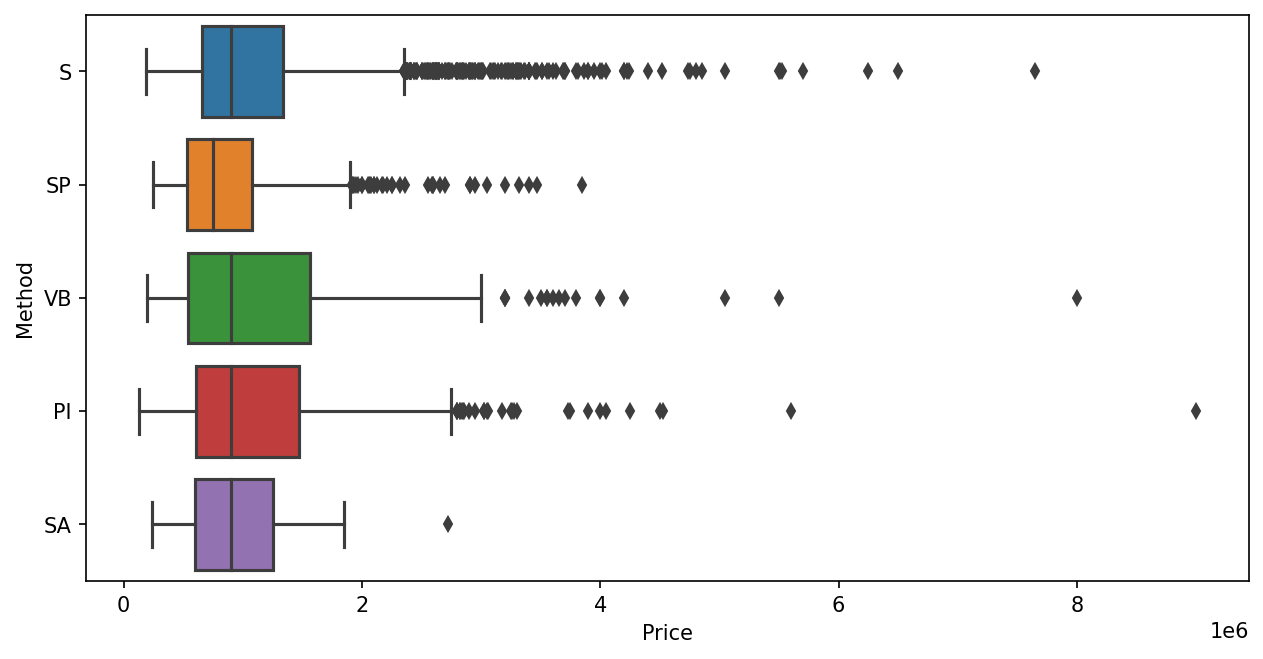

In [91]:
plt.figure(figsize=(10,5), dpi=150)
sns.boxplot(x='Price', y='Method',data=melbourne)

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Rooms Available for Lisiting'}, xlabel='Rooms', ylabel='count'>

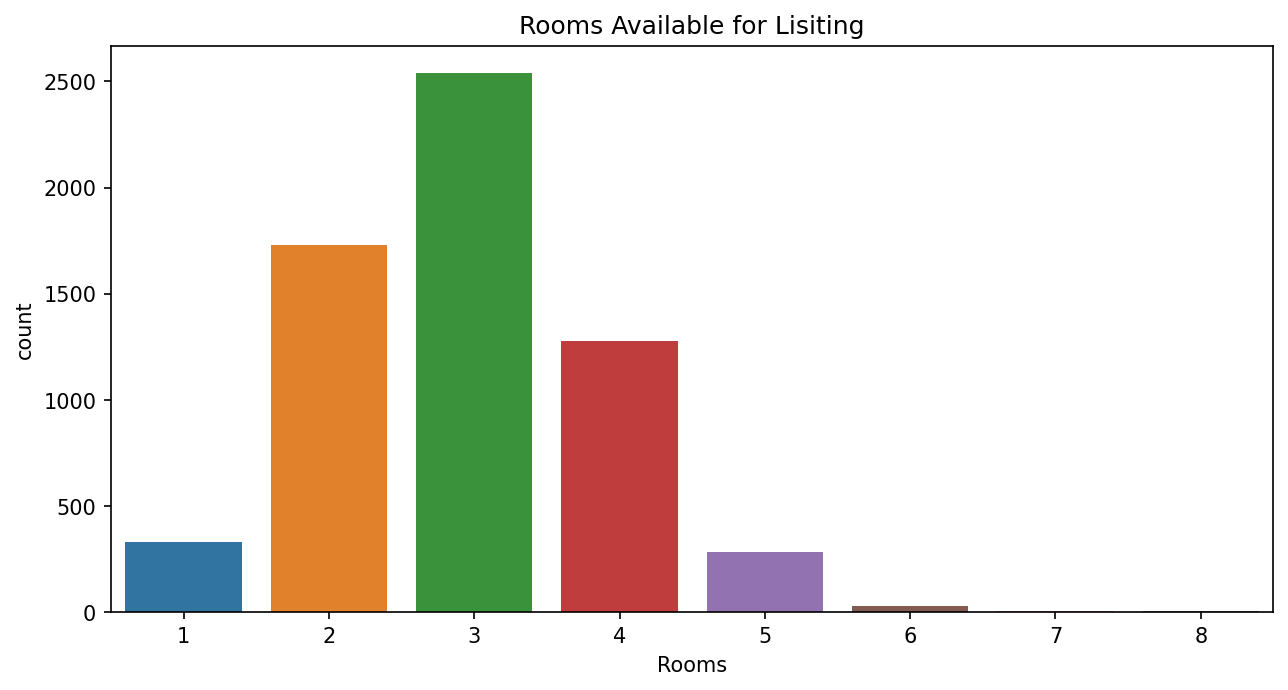

In [92]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Rooms Available for Lisiting')
sns.countplot(melbourne['Rooms'])

* Keys for the `Type` variable: 
    * br - bedroom(s); 
    * h - house,cottage,villa, semi,terrace; 
    * u - unit, duplex; 
    * t - townhouse; dev site - development site; 
    * o res - other residential.

In [29]:
melbourne.Type.value_counts()

h    4088
u    1506
t     602
Name: Type, dtype: int64

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Listing Types Available'}, xlabel='Type', ylabel='count'>

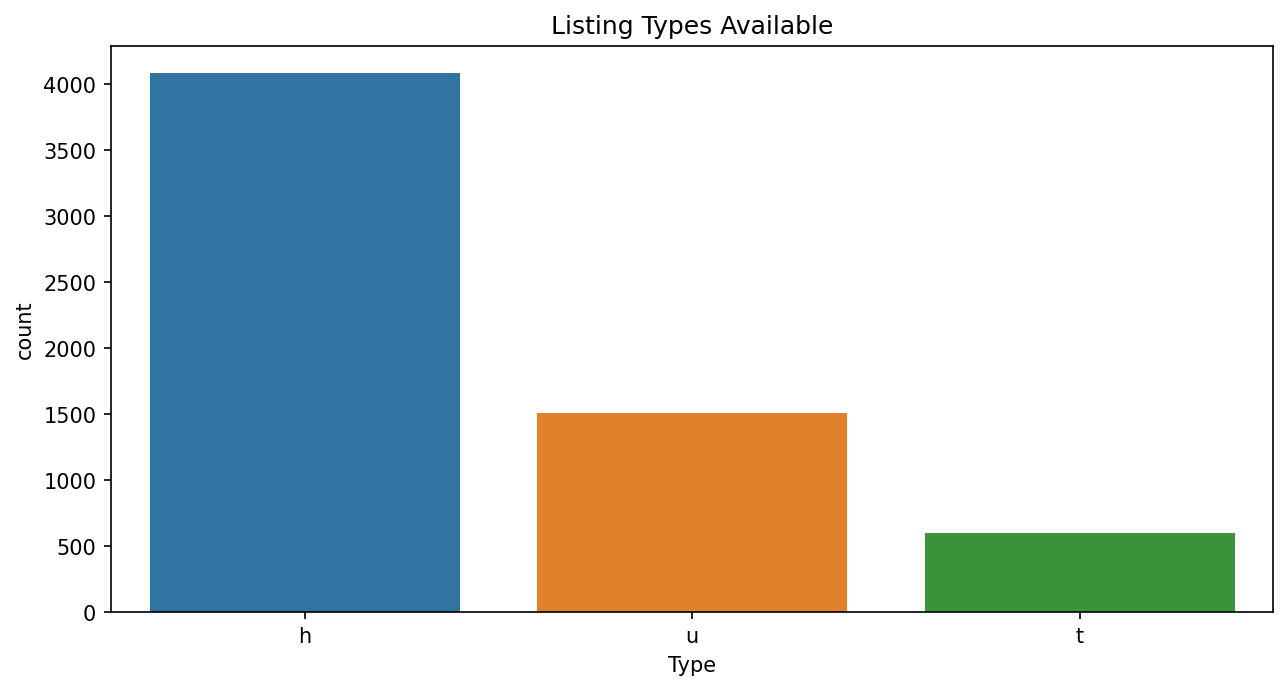

In [93]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Listing Types Available')
sns.countplot(melbourne['Type'])

In [31]:
# Most Expensive Listing
melbourne.Price.max()

9000000.0

In [32]:
# Index of the highest priced listing
melbourne['Price'].idxmax()

12094

In [33]:
# Location of such property listing
melbourne.loc[12094]

Suburb                             Mulgrave
Address                         35 Bevis St
Rooms                                     3
Type                                      h
Price                             9000000.0
Method                                   PI
SellerG                                Hall
Date                    2017-07-29 00:00:00
Distance                               18.8
Postcode                             3170.0
Bedroom2                                3.0
Bathroom                                1.0
Car                                     1.0
Landsize                              744.0
BuildingArea                          117.0
YearBuilt                            1960.0
CouncilArea                          Monash
Lattitude                         -37.93168
Longtitude                        145.16126
Regionname       South-Eastern Metropolitan
Propertycount                        7113.0
Name: 12094, dtype: object

In [34]:
# Least property listing
melbourne.Price.idxmin()

1805

In [35]:
# details of property with least price
melbourne.loc[1805]

Suburb                       Caulfield
Address                     30 Pyne St
Rooms                                4
Type                                 h
Price                         131000.0
Method                              PI
SellerG                         Rodney
Date               2017-02-25 00:00:00
Distance                           8.9
Postcode                        3162.0
Bedroom2                           4.0
Bathroom                           1.0
Car                                2.0
Landsize                         499.0
BuildingArea                     155.0
YearBuilt                       1920.0
CouncilArea                  Glen Eira
Lattitude                     -37.8864
Longtitude                    145.0242
Regionname       Southern Metropolitan
Propertycount                   2379.0
Name: 1805, dtype: object

* Keys for the `Method` variable: 
    * S - property sold; 
    * SP - property sold prior; 
    * PI - property passed in; 
    * PN - sold prior not disclosed; 
    * SN - sold not disclosed; 
    * NB - no bid; 
    * VB - vendor bid; 
    * W - withdrawn prior to auction; 
    * SA - sold after auction; 
    * SS - sold after auction price not disclosed. 
    * N/A - price or highest bid not available.

In [36]:
melbourne.Method.value_counts()

S     3957
SP     898
PI     757
VB     543
SA      41
Name: Method, dtype: int64

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Methods of House Listings'}, xlabel='Method', ylabel='count'>

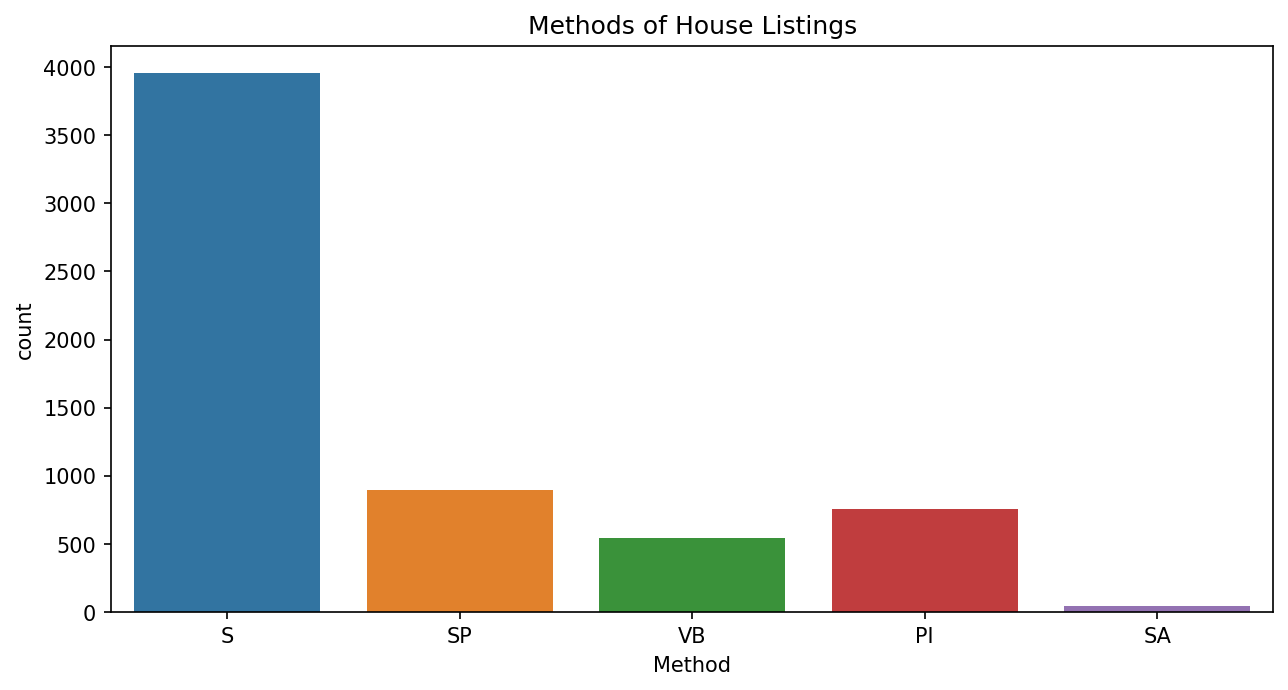

In [81]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Methods of House Listings')
sns.countplot(melbourne['Method'])

In [38]:
melbourne.Bedroom2.value_counts()

3.0    2549
2.0    1783
4.0    1225
1.0     338
5.0     261
6.0      27
0.0       5
7.0       4
9.0       3
8.0       1
Name: Bedroom2, dtype: int64

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Bedrooms Available for Lisiting'}, xlabel='Bedroom2', ylabel='count'>

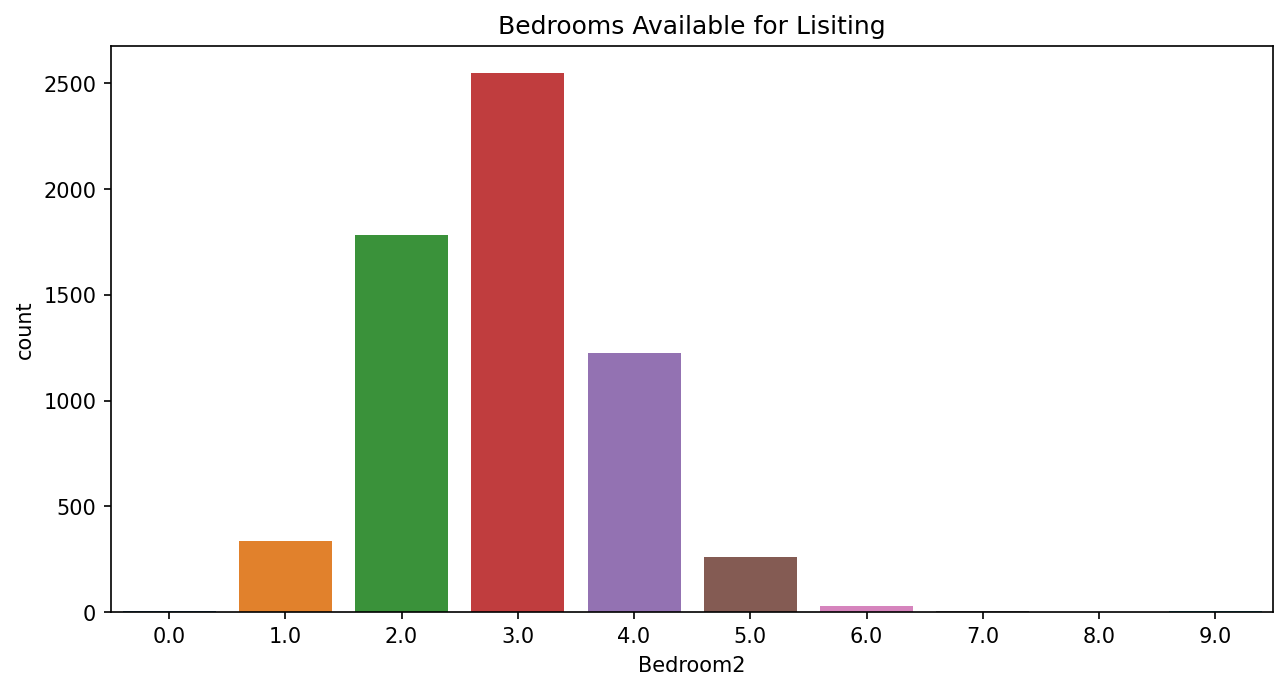

In [82]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Bedrooms Available for Lisiting')
sns.countplot(melbourne['Bedroom2'])

In [40]:
melbourne.Bathroom.value_counts()

1.0    3284
2.0    2365
3.0     463
4.0      64
5.0      15
6.0       3
7.0       1
8.0       1
Name: Bathroom, dtype: int64

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Bathrooms Available for Lisiting'}, xlabel='Bathroom', ylabel='count'>

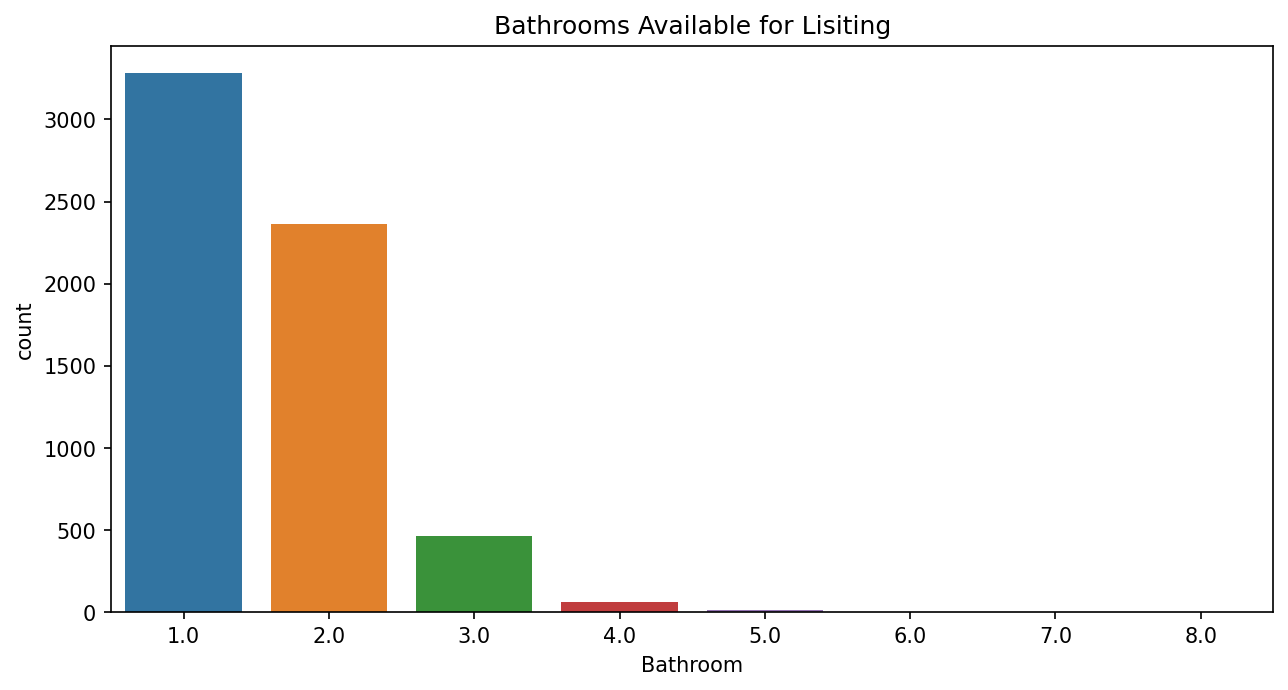

In [94]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Bathrooms Available for Lisiting')
sns.countplot(melbourne['Bathroom'])

In [42]:
# Correlation of the variables
correlation = melbourne.corr()
correlation

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


<AxesSubplot:>

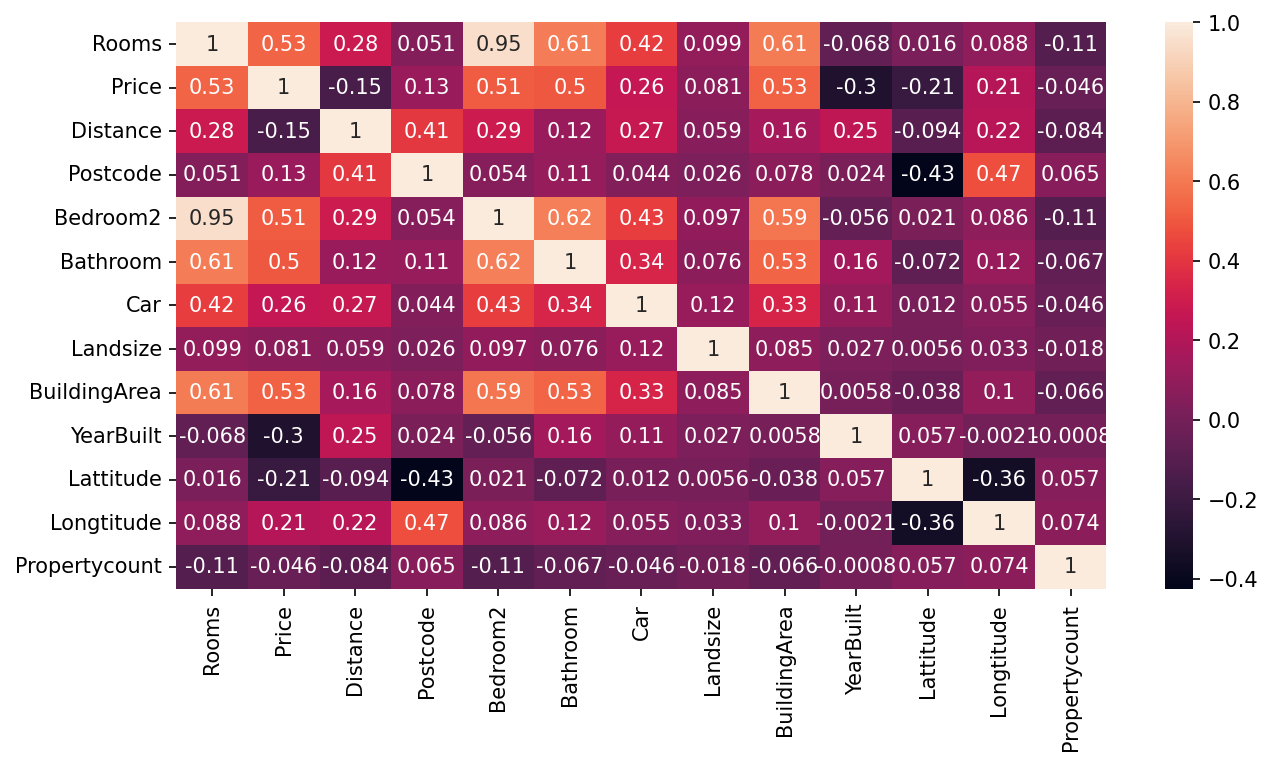

In [95]:
plt.figure(figsize=(10,5), dpi=150)
sns.heatmap(correlation, annot=True)

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>],
       [<AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

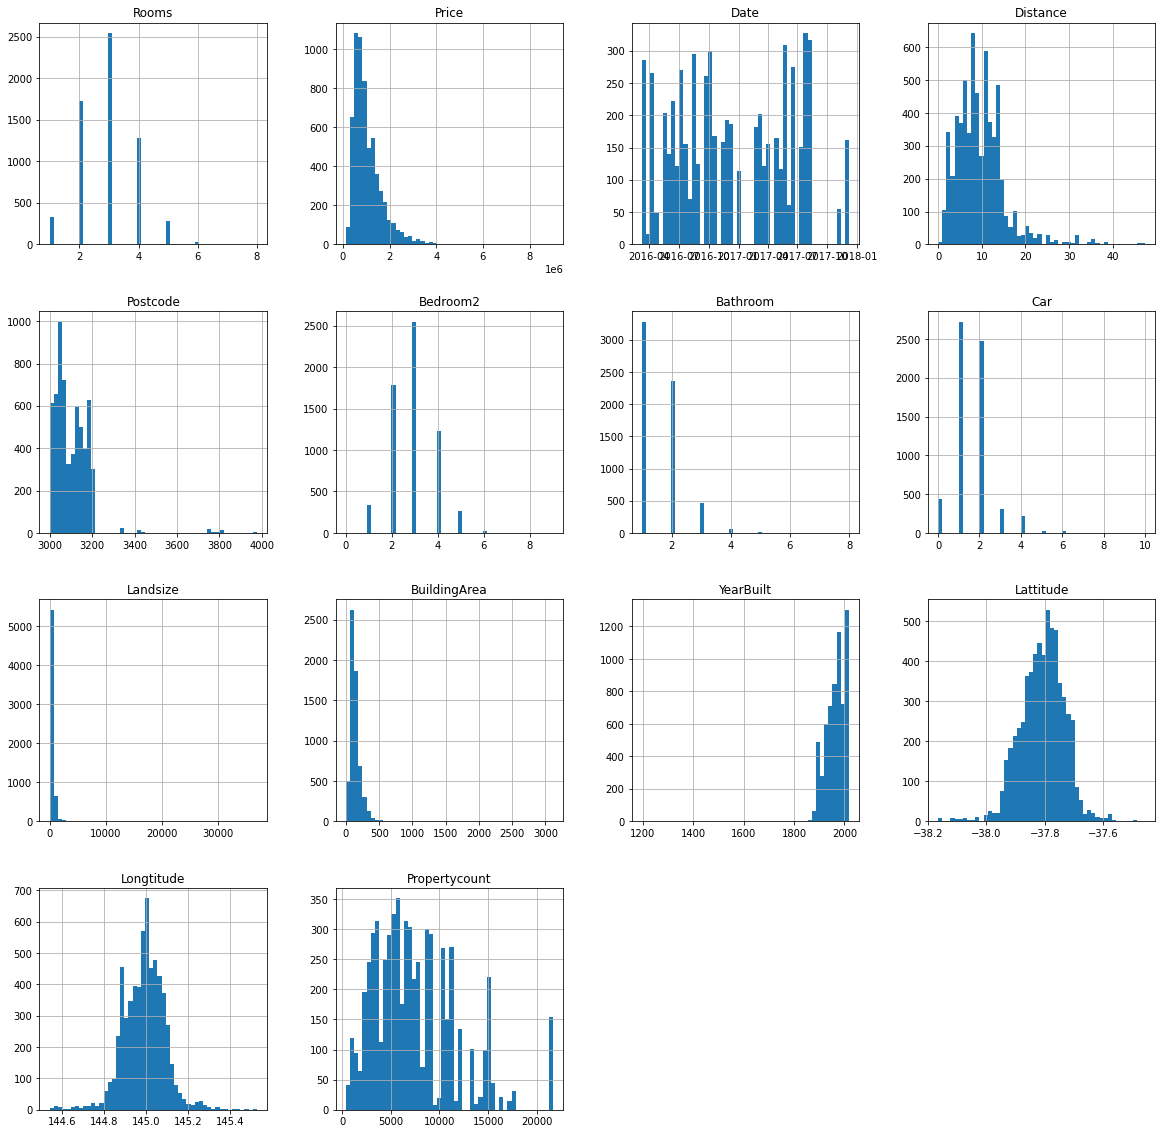

In [100]:
melbourne.hist(bins=50, figsize=(20,20))

#### 3. Building Models to Predict the Price 

In [44]:
['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [45]:
features = ['Rooms', 'Landsize', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Car']

In [46]:
X = melbourne[features]
y = melbourne.Price

In [47]:
X.head()

,Rooms,Landsize,BuildingArea,Bedroom2,Bathroom,Car
1,2,156.0,79.0,2.0,1.0,0.0
2,3,134.0,150.0,3.0,2.0,0.0
4,4,120.0,142.0,3.0,1.0,2.0
6,3,245.0,210.0,4.0,2.0,0.0
7,2,256.0,107.0,2.0,1.0,2.0


In [48]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.80)


In [50]:
print(X_train.shape, X_test.shape, X.shape)

(4956, 6) (1240, 6) (6196, 6)


In [51]:
print(y_train.shape, y_test.shape, y.shape)

(4956,) (1240,) (6196,)


#### 3a. Using Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
#Fitting
model.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(X_test)
mean_absolute_error(y_test,y_pred)

350925.8307747032

In [101]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_pred)
MSE = np.sqrt(MSE)
MSE


507005.36128845275

257054436375.23453
 


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

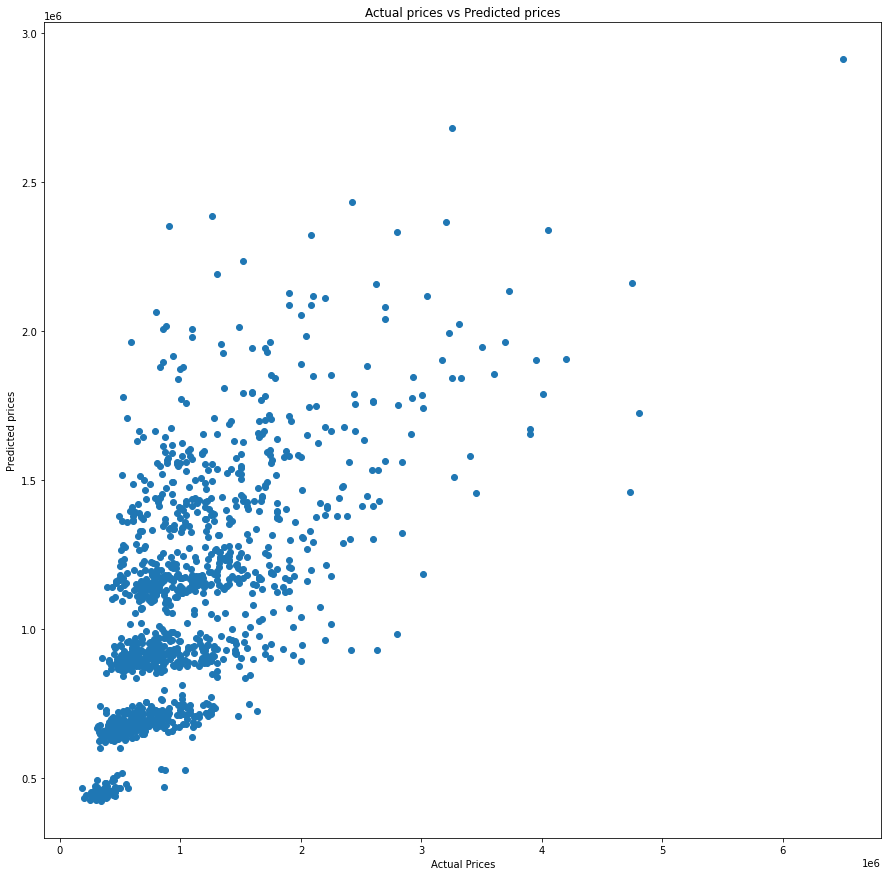

In [55]:
from sklearn.metrics import mean_squared_error
Mean_Square_Error = mean_squared_error(y_test, y_pred)
print(Mean_Square_Error)
print(' ')
plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [56]:
model.score(X_test, y_test)

0.42298297000233276

In [115]:
models_summary = pd.DataFrame([],columns=['model_name', 'prediction_score', 'mean_absolute_error'])
models_summary = models_summary.pd.concat({'model_name': model.__class__.__name__,
    'prediction_score': model.score(X_test, y_test),
    'mean_absolute_error' : mean_absolute_error(y_test,y_pred)}, ignore_index=True)

C:\Users\Ofori Kingsley\AppData\Local\Temp\ipykernel_10408\3170087278.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append({'model_name': model.__class__.__name__,


In [116]:
models_summary

,model_name,prediction_score,mean_absolute_error
0,LinearRegression,0.422983,350925.830775


* The R-Squared Value of 0.42(42%) indicates the good fit for the test data.

#### 3b. Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=3)

In [118]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=3)

In [121]:
ydt_pred = dt.predict(X_test)
tree_mse = mean_squared_error(y_test, ydt_pred)
tree_mse = np.sqrt(tree_mse)
print('tree_mse:',tree_mse)
print(' ')
mean_absolute_error(ydt_pred,y_test)


tree_mse: 670449.4618528442
 


439286.23425644694

In [124]:
models_summary = models_summary.append({
    'model_name': dt.__class__.__name__,
    'prediction_score': dt.score(X_test, y_test),
    'mean_absolute_error' : mean_absolute_error(ydt_pred,y_test)
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)
models_summary

C:\Users\Ofori Kingsley\AppData\Local\Temp\ipykernel_10408\218614247.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append({


,model_name,prediction_score,mean_absolute_error
0,LinearRegression,0.422983,350925.830775
1,DecisionTreeRegressor,-0.009010,439286.234256


In [60]:
dt.score(X_test, y_test)

-5.9702102466197005e-06

In [103]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [104]:
forest_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mse = np.sqrt(forest_mse)
print('forest_mse:',forest_mse)
print(' ')
mean_absolute_error(forest_pred,y_test)


forest_mse: 492596.82768164977
 


326455.4523292196

In [107]:
forest_reg.score(X_test, y_test)

0.45531332771539856

In [125]:
models_summary = models_summary.append({
    'model_name': forest_reg.__class__.__name__,
    'prediction_score': forest_reg.score(X_test, y_test),
    'mean_absolute_error' : mean_absolute_error(forest_pred,y_test)
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)
models_summary

C:\Users\Ofori Kingsley\AppData\Local\Temp\ipykernel_10408\3228464656.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append({


,model_name,prediction_score,mean_absolute_error
0,LinearRegression,0.422983,350925.830775
1,DecisionTreeRegressor,-0.009010,439286.234256
2,RandomForestRegressor,0.455313,326455.452329
